In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [2]:
rawdata = pd.read_csv(r'C:\Users\52296881\Downloads\airbnb\airbnb_listing_train.csv')
testdata = pd.read_csv(r'C:\Users\52296881\Downloads\airbnb\airbnb_listing_validate.csv')
df = rawdata.copy()

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [4]:
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

12901
12901


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [6]:
len(df['name'].unique())

12654

In [7]:
df.drop(['neighbourhood_group','host_name','host_id','id','name','latitude','longitude','last_review'],axis=1,inplace=True)
testdata.drop(['neighbourhood_group','host_name','host_id','id','name','latitude','longitude','last_review'],axis=1,inplace=True)

In [8]:
df.corr()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
minimum_nights,1.000000,-0.022010,-0.029696,-0.006950,0.056951,0.026569
number_of_reviews,-0.022010,1.000000,0.768207,-0.020619,0.274252,-0.035141
reviews_per_month,-0.029696,0.768207,1.000000,0.014680,0.304831,-0.003736
calculated_host_listings_count,-0.006950,-0.020619,0.014680,1.000000,0.095783,0.057314
availability_365,0.056951,0.274252,0.304831,0.095783,1.000000,0.153993
price,0.026569,-0.035141,-0.003736,0.057314,0.153993,1.000000


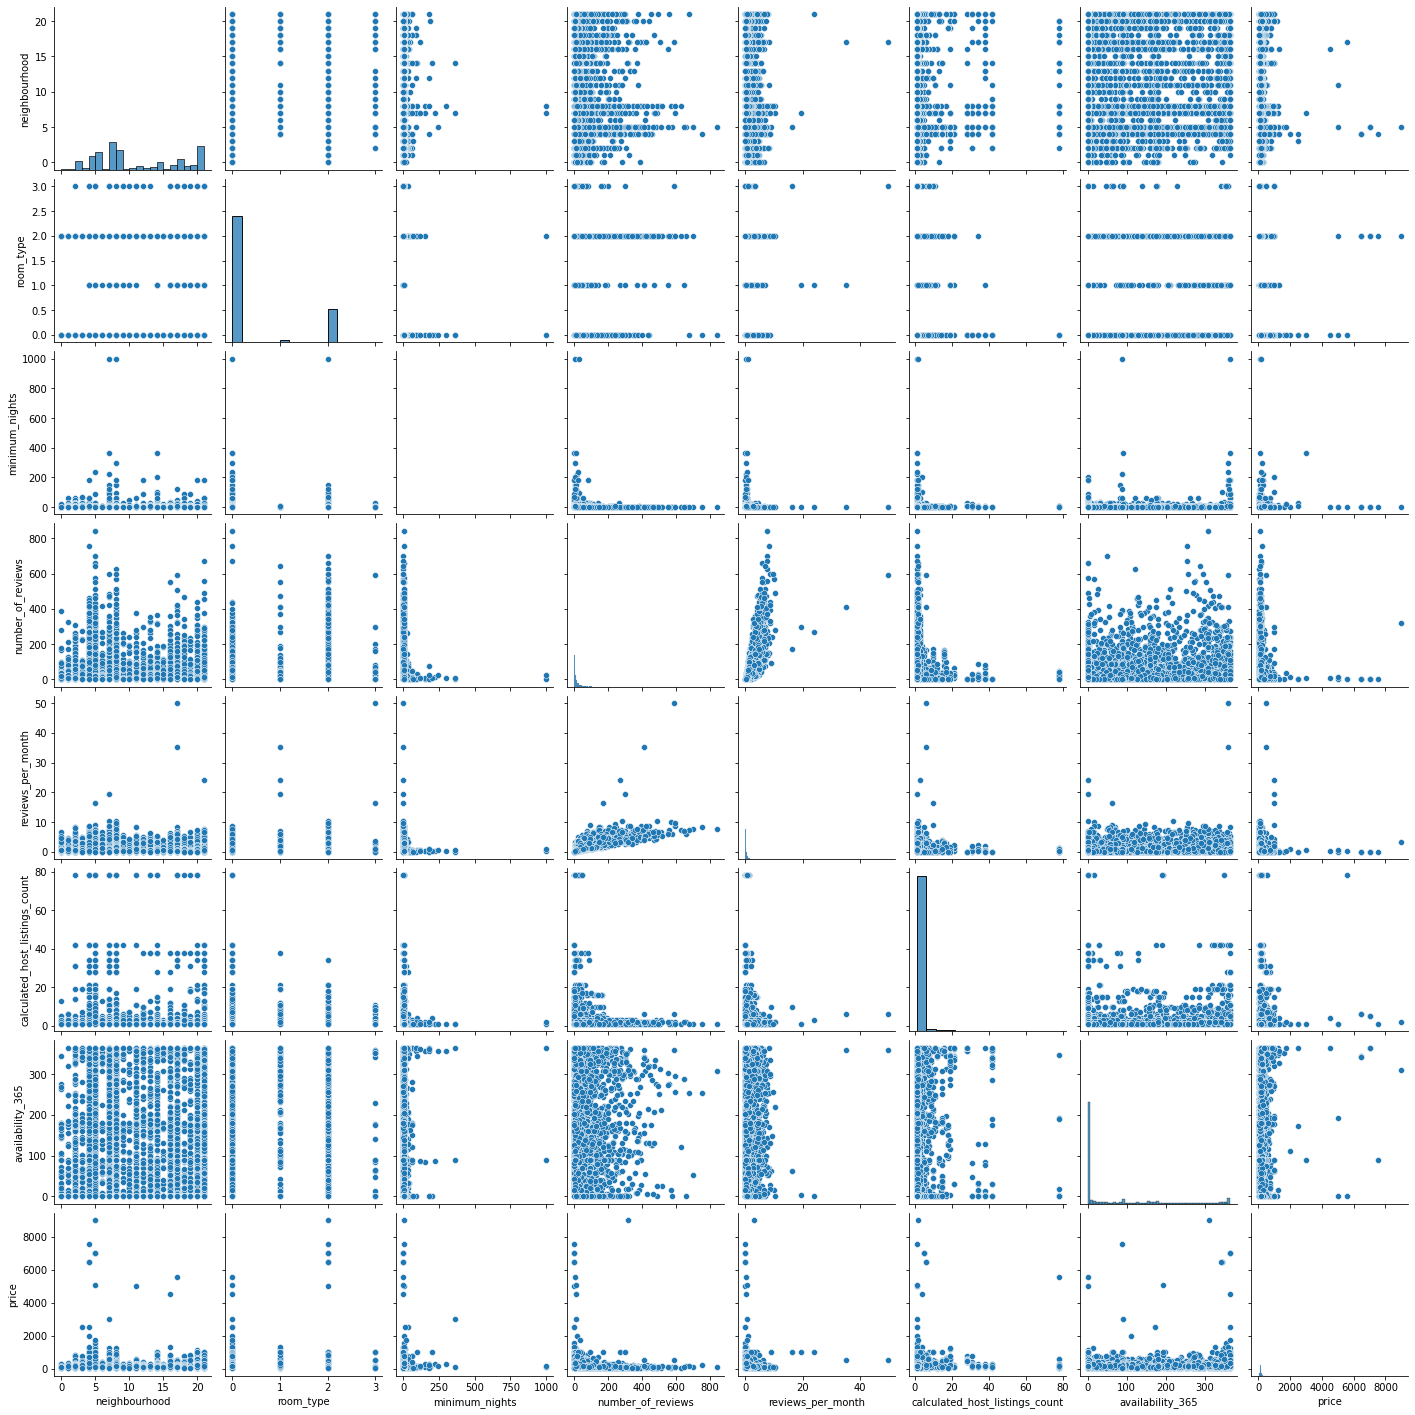

In [21]:
sns.pairplot(df)

In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(exclude=np.number):
    le.fit(df[col])
    df[col] = le.transform(df[col])
    testdata[col] = le.transform(testdata[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12901 entries, 0 to 12900
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   12901 non-null  int32  
 1   room_type                       12901 non-null  int32  
 2   minimum_nights                  12901 non-null  int64  
 3   number_of_reviews               12901 non-null  int64  
 4   reviews_per_month               11305 non-null  float64
 5   calculated_host_listings_count  12901 non-null  int64  
 6   availability_365                12901 non-null  int64  
 7   price                           12901 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 806.3 KB


In [11]:
df = df.fillna(0)
testdata = testdata.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12901 entries, 0 to 12900
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   12901 non-null  int32  
 1   room_type                       12901 non-null  int32  
 2   minimum_nights                  12901 non-null  int64  
 3   number_of_reviews               12901 non-null  int64  
 4   reviews_per_month               12901 non-null  float64
 5   calculated_host_listings_count  12901 non-null  int64  
 6   availability_365                12901 non-null  int64  
 7   price                           12901 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 806.3 KB


<AxesSubplot:>

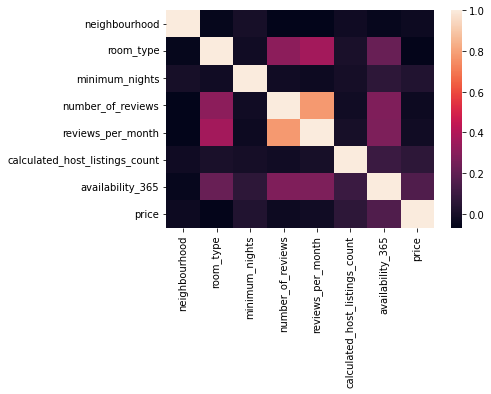

In [22]:
sns.heatmap(data=df.corr())

In [12]:
X_data = df.iloc[:,0:7]
Y_data = df.iloc[:,7]

In [13]:
X_data,Y_data

(       neighbourhood  room_type  minimum_nights  number_of_reviews  \
 0                  8          0               3                 13   
 1                 17          0               4                 14   
 2                  5          0               2                  9   
 3                 20          0               3                 42   
 4                 20          2               2                 89   
 ...              ...        ...             ...                ...   
 12896              7          0               1                  1   
 12897             11          0               7                238   
 12898              8          0               3                 15   
 12899             21          0               2                 11   
 12900              4          1               5                  1   
 
        reviews_per_month  calculated_host_listings_count  availability_365  
 0                   0.27                               1           

In [14]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
X_data = ss.fit_transform(X_data)
testdata = ss.transform(testdata)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.3)

In [17]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.03572622720991747

In [18]:
las = Lasso()
las.fit(X_train,Y_train)
las.score(X_test,Y_test)

0.03657902120936185

In [19]:
rid = Ridge()
rid.fit(X_train,Y_train)
rid.score(X_test,Y_test)

0.03572605340214208

In [20]:
testpred = las.predict(testdata)
testpred

array([251.40897688, 222.57256836, 151.39409833, ..., 110.28802353,
       154.96426416, 159.32310293])